In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
def unite(a, linked):
    if linked[a] == a:
        return a
    else:
        linked[a] = unite(linked[a], linked)
        return linked[a]
def unionSet(a, b, linked):
    linked[unite(a, linked)] = unite(b, linked)

In [3]:
def connComponents(im):
    next_label = 1;
    labels = np.zeros(im.shape, dtype=int)
    linked = [0]
    h, w = im.shape
    for row in range(h):
        for column in range(w):
            if im[row, column] != 0:
                neighbors = []
                if row > 0:
                    if im[row-1][column] == im[row, column]:
                        neighbors.append((row-1, column))
                if row > 0 and column + 1 < im.shape[1]:
                    if im[row-1, column+1] == im[row, column]:
                        neighbors.append((row-1, column+1))
                if row > 0 and column > 0:
                    if im[row-1, column-1] == im[row, column]:
                        neighbors.append((row-1, column-1))
                if column > 0:
                    if (im[row, column-1] == im[row, column]):
                        neighbors.append((row, column-1))

                if len(neighbors) == 0:
                    linked.append(next_label)
                    labels[row, column] = next_label
                    next_label += 1
                
                else:
                    L = [labels[r, c] for r, c in neighbors]
                    labels[row, column] = min(L)
                    for label in L:
                        unionSet(label, labels[row, column], linked)
                        
    for row in range(im.shape[0]):
        for column in range(im.shape[1]):
            if im[row, column] != 0:
                labels[row, column] = unite(labels[row, column], linked)
    return labels

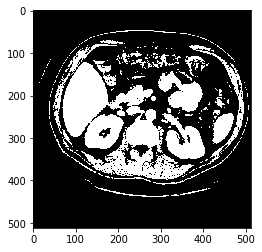

In [4]:
im = cv2.imread('./images/kidney.jpg',0);
bin_kidney = np.uint8(im > 128)
plt.imshow(bin_kidney,cmap = cm.gray)

In [8]:
bin_kidney.dtype

dtype('uint8')

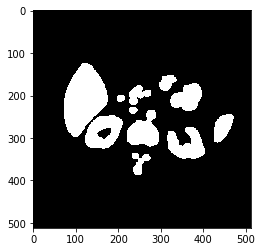

In [5]:
opener = 16
closer = 3

open_ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (opener,opener))
close_ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (closer, closer))

# Opening
kidney_open = cv2.erode(bin_kidney,open_ellipse)
kidney_open = cv2.dilate(kidney_open,open_ellipse)

# Closing
kidney_close = cv2.dilate(kidney_open,close_ellipse)
kidney_close = cv2.erode(kidney_open,close_ellipse)

plt.imshow(kidney_close,cmap=cm.gray)

In [6]:
labelled = connComponents(kidney_close)

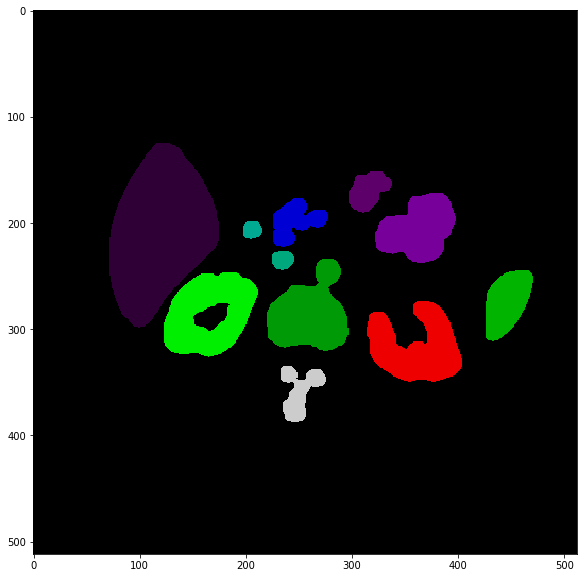

In [7]:
plt.figure(figsize = (10,10))
plt.imshow(labelled,cmap = cm.nipy_spectral)